# Simple DNN

DNN (Deep Neural Network)
* **DNN (Deep Neural Network):** A **deep neural network (DNN)** is an artificial neural network (ANN) with multiple layers between the input and output layers
* **DNN (Deep Neural Network):** has multiple hidden layers 
* If there are many layers, it cause **vanishing gradient problem**, So it is key point to prevent **overfitting**
* Our **DNN** is focusing on classification which ficture is, when **DNN** gets ficture of 10 classes (CIFAR-10)
* We are using Keras module

<hr>

How to use this notebook :

There is only minimum explanation

This notebook could be helpful for who want to see how code works right away

Please upvote if it was helpful !

<hr>

## Content
1. [Import Libraries](#one)
2. [Prepare Data](#two)
3. [Modeling](#three)
4. [Training & Evaluation](#four)

<hr>

<a id="one"></a>
# 1. Import Libraries

In [1]:
from keras import layers, models
import numpy as np # to use reshape()
from keras import datasets  # we can bring our data from here
from keras.utils import np_utils  # to_categorical
import matplotlib.pyplot as plt


<a id="two"></a>
# 2. Prepare Data

* 60000 data ( 50000 for training, 10000 for test)
* 32 * 32 * 3 (RGB image),(each pixel can have 0~255 value)
* 0 ~ 9 (10 classes)
* https://www.cs.toronto.edu/~kriz/cifar.html

In [2]:
# bring our data

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 12s 0us/step


In [3]:
# check 

print(X_train.shape)
print(X_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
# check

X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

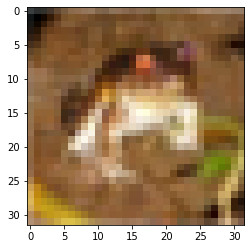

In [5]:
# check

plt.imshow(X_train[0])
plt.show()

In [6]:
# we change from output(0~9) to output((0 or 1) * 10) vector

Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [7]:
# we need to change 3 dimention data to 2 dimention for training

L, W, H, C = X_train.shape # L = data count, W = width, H = heigh, C = RGB

# DNN handle 2-dimention vector data type, so we need to change to (first line = data count, second = W*H*C)
X_train = X_train.reshape(-1,W*H*C) # -1 means auto
X_test = X_test.reshape(-1,W*H*C)

In [8]:
X_train.shape

(50000, 3072)

In [9]:
# normalization

X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    L, W, H, C = X_train.shape 
    
    X_train = X_train.reshape(-1, W * H * C)
    X_test = X_test.reshape(-1, W * H * C)

    # normalization
    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)

<a id="three"></a>
# 3. Modeliing

* We use relu activation function for preventing overfitting
* Dropout(P) means Send a signal with P probability

In [11]:
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Pd_l, Nout):
        super().__init__()
        
        # first hidden layer
        self.add(layers.Dense(Nh_l[0], activation='relu',
                              input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dropout(Pd_l[0]))      
        
        # second hidden layer (we dont have to set input_shape, keras do it)
        self.add(layers.Dense(Nh_l[1], activation='relu',
                              name='Hidden-2'))
        self.add(layers.Dropout(Pd_l[1]))

        
        # output layer
        self.add(layers.Dense(Nout, activation='softmax'))

        self.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

<a id="four"></a>
# 4. Training & Evaluation

In [12]:
# check for accuracy
def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()
    
# check for loss
def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])     # training loss
    plt.plot(history['val_loss']) # validation loss
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()

Epoch 1/100
400/400 [==============================] - 4s 8ms/step - loss: 2.0386 - accuracy: 0.2546 - val_loss: 1.7980 - val_accuracy: 0.3543
Epoch 2/100
400/400 [==============================] - 3s 6ms/step - loss: 1.7610 - accuracy: 0.3734 - val_loss: 1.7175 - val_accuracy: 0.3867
Epoch 3/100
400/400 [==============================] - 2s 6ms/step - loss: 1.6848 - accuracy: 0.3939 - val_loss: 1.6990 - val_accuracy: 0.3938
Epoch 4/100
400/400 [==============================] - 2s 6ms/step - loss: 1.6271 - accuracy: 0.4168 - val_loss: 1.6591 - val_accuracy: 0.4093
Epoch 5/100
400/400 [==============================] - 2s 6ms/step - loss: 1.6047 - accuracy: 0.4328 - val_loss: 1.6926 - val_accuracy: 0.3915
Epoch 6/100
400/400 [==============================] - 3s 6ms/step - loss: 1.5738 - accuracy: 0.4411 - val_loss: 1.6164 - val_accuracy: 0.4241
Epoch 7/100
400/400 [==============================] - 3s 6ms/step - loss: 1.5571 - accuracy: 0.4442 - val_loss: 1.6030 - val_accuracy: 0.4294

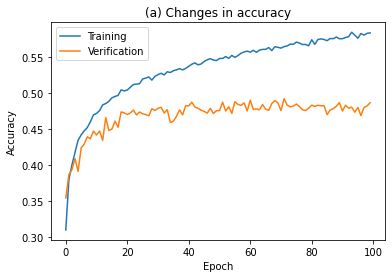

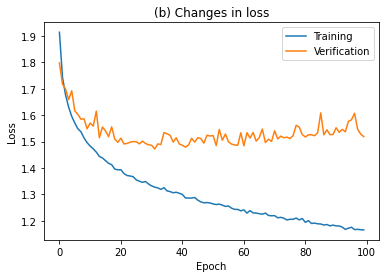

In [13]:
def main(Pd_l=[0.0, 0.0]):
    Nh_l = [100, 50]
    number_of_class = 10
    Nout = number_of_class

    (X_train, Y_train), (X_test, Y_test) = Data_func()
    model = DNN(X_train.shape[1], Nh_l, Pd_l, Nout)
    history = model.fit(X_train, Y_train, epochs=100, batch_size=100, validation_split=0.2)

    performace_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performace_test)

    plot_acc(history, '(a) Changes in accuracy')
    plt.show()
    plot_loss(history, '(b) Changes in loss')
    plt.show()


if __name__ == '__main__':
    main(Pd_l=[0.0, 0.0])

## Reference
* Coding chef 3 minute deep learning  -(https://github.com/jskDr/keraspp/blob/master/ex3_2_dnn_cifar10_cl.py)